### locally weighted linear regression

$\sum_i^n w^{(i)} [y^{(i)}-\theta^T x^{(i)}]^2$

$n$ - number of training data

$w^{(i)}=\exp{\left[-\frac{(x^{(i)}-x)^T (x^{(i)}-x)}{2\tau^2} \right]}$

a closed form solution

$\theta=(X^TWX)^{-1}(X^TWY)$

ref:

https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf


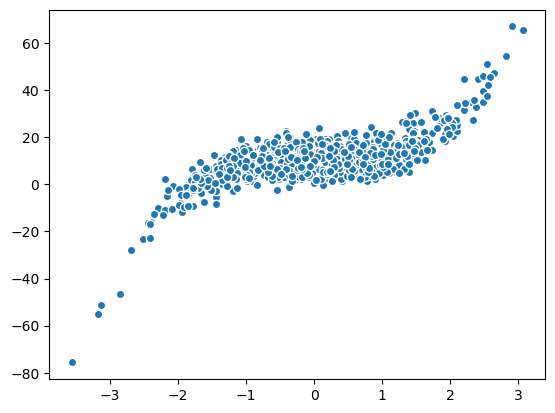

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

np.random.seed(8)
X=np.random.randn(1000,1)
y=2*(X**3) + 10 + 4.6*np.random.randn(1000,1)

plt.plot(X,y,'o',markeredgecolor='w')

In [2]:
m=X.shape[0]
w=np.mat(np.eye(m))

In [3]:
w

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [4]:
def weight_matrix(pt,X,tau):
    
    m=X.shape[0]
    w=np.mat(np.eye(m))
    
    for i in range(m):
        xi=X[i]
        d=(-2*tau*tau)
        w[i,i]=np.exp(np.dot((xi-pt),(xi-pt).T)/d)
        
    return w

In [5]:
def predict(X,y,pt,tau=0.08):
    
    m=X.shape[0]
    
    #adding bias term
    X_=np.append(X,np.ones(m).reshape(m,1),axis=1)
    
    pt_=np.array([pt,1])
    
    w=weight_matrix(pt_,X_,tau)
    
    theta=np.linalg.pinv(X_.T*(w*X_))*(X_.T*(w*y))
    
    pred=np.dot(pt_,theta)
    
    return theta,pred

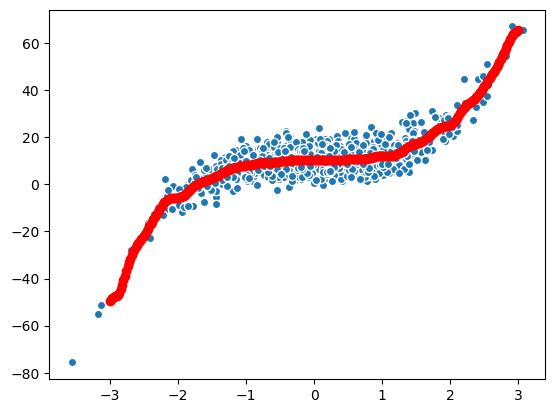

In [6]:
n=300
X_test=np.linspace(-3,3,n)

preds=[]
for pt in X_test:
    
    theta,pred=predict(X,y,pt,tau=0.1)
    preds.append(pred)
    
X_test=np.array(X_test).reshape(n,1)
preds=np.array(preds).reshape(n,1)

plt.plot(X,y,'o',markeredgecolor='w')
plt.plot(X_test,preds,'ro')

https://www.geeksforgeeks.org/locally-weighted-linear-regression-using-python/

In [7]:
# Necessary imports
import numpy as np
#from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
%matplotlib inline
#output_notebook()
#plt.style.use('seaborn-dark')

# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
	# add bias term
	x0 = np.r_[1, x0]
	X = np.c_[np.ones(len(X)), X]
	
	# fit model: normal equations with kernel
	xw = X.T * weights_calculate(x0, X, tau)
	theta = np.linalg.pinv(xw @ X) @ xw @ Y
	# "@" is used to
	# predict value
	return x0 @ theta

# function to perform weight calculation
def weights_calculate(x0, X, tau):
	return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))

# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
	# prediction
	domain = np.linspace(-3, 3, num=300)
	prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]

	plot = figure(plot_width=400, plot_height=400)
	plot.title.text = 'tau=%g' % tau
	plot.scatter(X, Y, alpha=.3)
	plot.line(domain, prediction, line_width=2, color='red')
	
	return plot

#define distribution
n = 1000

# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1)

# jitter X
X += np.random.normal(scale=.1, size=n)

# show the plots for different values of Tau
show(gridplot([
	[plot_lwr(10.), plot_lwr(1.)],
	[plot_lwr(0.1), plot_lwr(0.01)]
]))


In [8]:
!pip install bokeh


### logistic regression

cross entropy loss

https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/#:~:text=The%20cost%20function%20used%20in%20Logistic%20Regression%20is%20Log%20Loss.

$loss=-\frac{1}{N}\left[ \sum_{i=1}^N y_i \log (p(y_i))+(1-y_i)\log (1-p(y_i)) \right]$

this is from the log loss 

$log loss= -\frac{1}{N} \sum_{i=1}^N \log (p_i)$


|id |actual |predicted |corrected |log|-log|
|-|-|-|-|-|-|
|0|1|0.94|0.94|-0.02687|0.02687|
|1|1|0.9 |0.9 |-0.04576|0.04576|
|2|1|0.78|0.78|-0.10791|0.10791|
|3|0|0.56|0.44|-0.35655|0.35655|
|4|0|0.51|0.49|-0.3098 |0.3098 |
|5|1|0.47|0.47|-0.3279 |0.3279 |
|6|1|0.32|0.32|-0.49485|0.49485|
|7|0|0.1 |0.9 |-0.04576|0.04576|

when the probability is close to 1, log loss is close to 0

so the goal is to minimize the log loss

/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50670/3551443053.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,-np.log(x),label='-log(x)')
/var/folders/89/wkwstz_d4zq1pshpw71z9wb80000gp/T/ipykernel_50670/3551443053.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,-np.log(1-x),label='-log(1-x)')


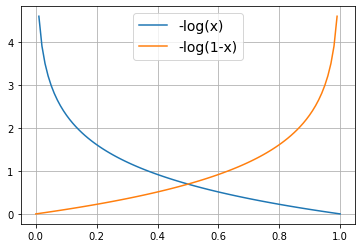

In [9]:
x=np.linspace(0,1,num=100)
plt.plot(x,-np.log(x),label='-log(x)')
plt.plot(x,-np.log(1-x),label='-log(1-x)')
plt.grid()
plt.legend(fontsize=14)

In [10]:
def sigmoid(x):
    
    #can be applied to all eles in a np array because of np.exp
    return 1/(1+np.exp(-x))

def cost(X,y,w):
    
    n=len(y)
    h=sigmoid(X@w)
    eps=1e-5
    
    
    #+eps prevent log underflow
    #-logloss
    return ((1/n)*(((-y).T@np.log(h+eps))-((1-y).T@np.log(1-h+eps))))[0][0]

def gradient_descent(X,y,w,lr,n_iters):
    
    n=len(y)
    costs=[]
    
    for i in range(n_iters):
        
        w=w-(lr/n)*(X.T@(sigmoid(X@w)-y))
        costs.append(cost(X,y,w))
        
    return costs,w

def predict(X,w):
    
    #round up probabilities
    return np.round(sigmoid(X@w))

from sklearn.datasets import make_classification
X,y=make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                        n_clusters_per_class=1, random_state=14)



In [11]:
X.shape,y.shape

((500, 2), (500,))

/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

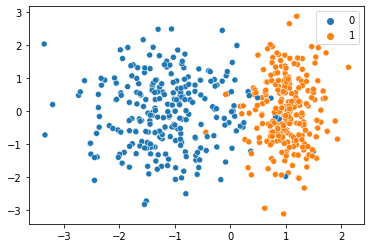

In [12]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [13]:

y=y[:,np.newaxis]
print(y.shape,X.shape)
n=len(y)
#add bias 1 vector (500,3)
X=np.hstack((np.ones((n,1)),X))

n_x=X.shape[1]
w=np.zeros((n_x,1))

n_iters=1500
lr=0.03
cost0=cost(X,y,w)

costs,w_op=gradient_descent(X,y,w,lr,n_iters)

(500, 1) (500, 2)


In [14]:
X

array([[ 1.        ,  0.94362459, -0.67978299],
       [ 1.        , -0.86801821, -0.2539218 ],
       [ 1.        , -1.76747111, -0.99992369],
       ...,
       [ 1.        ,  0.97582221, -0.99135789],
       [ 1.        ,  0.96005163,  0.58374514],
       [ 1.        , -1.52281126,  0.33935343]])

In [15]:
X,y=make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                        n_clusters_per_class=1, random_state=14)

X.shape,y.shape

((500, 2), (500,))

In [16]:
y=y[:,np.newaxis]

X=np.hstack((np.ones((len(y),1)),X))

X.shape,y.shape

((500, 3), (500, 1))

In [17]:
n_x=X.shape[1]
w=np.zeros((n_x,1))

w.shape

(3, 1)

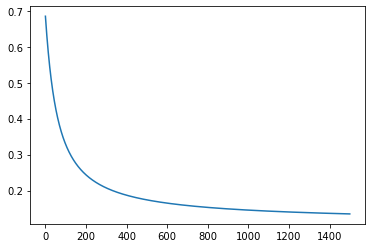

In [18]:
plt.plot(costs)

In [19]:
y_pred=predict(X,w_op)

score=float(sum(y_pred==y))/float(len(y))

print(score)

0.966


In [20]:
w_op

array([[-0.45293068],
       [ 3.26552327],
       [ 0.03334871]])

/Users/wang-j/miniforge3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


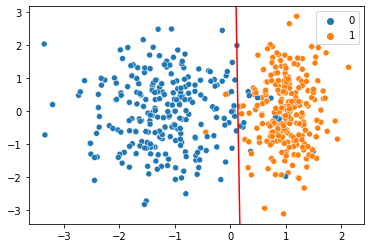

In [21]:
slope=-(w_op[1]/w_op[2])
intercept=-(w_op[0]/w_op[2])

sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1))
ax=plt.gca()
ax.autoscale(False)
x_vals=np.array(ax.get_xlim())
y_vals=intercept+slope*x_vals
plt.plot(x_vals,y_vals,'r')

In [22]:
w_op.shape

(3, 1)

In [23]:
(X@w_op).shape

(500, 1)

In [24]:
sigmoid(X@w_op).shape

(500, 1)

seaborn style

https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba